#### Author: Sandor Kanda

Created: 21/02/2023


### This jupyter file is to load a single image and convert it to a numpy array, then applying image processing tasks to it.
path: /home/skanda/kc_image_analysis/convertedImages/singleImage.ipynb


**%matplotlib inline** turns on inline plotting, where plot graphics will appear in your notebook. This has important implications for interactivity. For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot. For example, changing the colormap is not possible from cells below the cell that creates a plot. However, for other backends, such as Qt, that open a separate window, cells below those that create the plot will change the plot - it is a live object in memory.

In [1]:
%matplotlib inline

### Library Imports

In [2]:
# Library Imports
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter, ImageOps
from skimage import filters, io
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio







### Converting image data in a **numpy array** 

In [3]:
img = np.asarray(Image.open('/mnt/scratch/mehphoenix/Images/0a0de668-81fe-4e87-abd5-95b139823ce9/4c1305b9-3acf-4abc-9743-94c32401cc80/4c1305b9-3acf-4abc-9743-94c32401cc80.00'))
print(repr(img))

array([[[21, 21, 21],
        [27, 27, 27],
        [31, 31, 31],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [18, 18, 18]],

       [[21, 21, 21],
        [27, 27, 27],
        [32, 32, 32],
        ...,
        [19, 19, 19],
        [16, 16, 16],
        [21, 21, 21]],

       [[23, 23, 23],
        [28, 28, 28],
        [33, 33, 33],
        ...,
        [26, 26, 26],
        [23, 23, 23],
        [26, 26, 26]],

       ...,

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [10, 10, 10],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [12, 12, 12]],

       [[ 2,  2,  2],
        [ 6,  6,  6],
        [11, 11, 11],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [12, 12, 12]],

       [[ 1,  1,  1],
        [ 5,  5,  5],
        [11, 11, 11],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [12, 12, 12]]], dtype=uint8)


### Plotting the image

(1800, 600, 3)

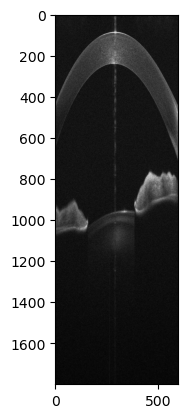

In [4]:
imgplot = plt.imshow(img)

img.shape

#### Cropping the bottom of the image which is meaningless

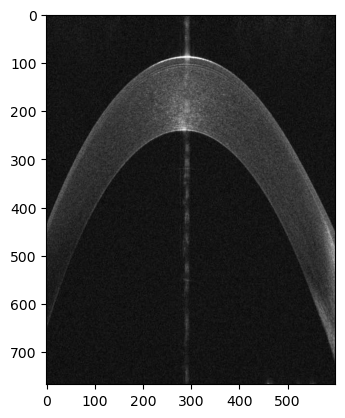

In [5]:


# Load the image as a NumPy array
img = plt.imread('/mnt/scratch/mehphoenix/Images/0a0de668-81fe-4e87-abd5-95b139823ce9/4c1305b9-3acf-4abc-9743-94c32401cc80/4c1305b9-3acf-4abc-9743-94c32401cc80.00')

# Get the dimensions of the image
height, width, _ = img.shape

# Set the number of pixels to crop from the bottom
crop_pixels = 1033

# Calculate the new dimensions of the image after cropping
new_height = height - crop_pixels
new_width = width

# Crop the image
cropped_img = img[0:new_height, 0:new_width]

# Display the cropped image
imgplot = plt.imshow(cropped_img)
plt.show()

# Save the cropped image as a new file
Image.fromarray((cropped_img * 255).astype(np.uint8)).save('/home/skanda/kc_image_analysis/convertedImages/cropped_image1.png')


### Applying Noise Supression **Gaussian smoothing** to the image and saving the original and smoothed image to /home/skanda/kc_image_analysis/convertedImages

In [7]:

image = img
img_array = np.array(image)

np.save('/home/skanda/kc_image_analysis/convertedImages/cropped_image1.npy', img_array)


# Load the input image as a NumPy array
img_array = np.array(Image.open('/mnt/scratch/mehphoenix/Images/0a0de668-81fe-4e87-abd5-95b139823ce9/4c1305b9-3acf-4abc-9743-94c32401cc80/4c1305b9-3acf-4abc-9743-94c32401cc80.00'))

# Convert the array to a PIL image
img = Image.fromarray(img_array)

# Convert the image to grayscale
gray_img = img.convert('L')

# Apply Gaussian smoothing to the image
gaussian_img = gray_img.filter(ImageFilter.GaussianBlur(radius=5))

# Save the original and smoothed images to disk in PNG format
img.save('/home/skanda/kc_image_analysis/convertedImages/original_image.png')
gaussian_img.save('/home/skanda/kc_image_analysis/convertedImages/smoothed_image_.png')

# Display a message to indicate that the images have been saved
print('Images saved to disk.')



Images saved to disk.


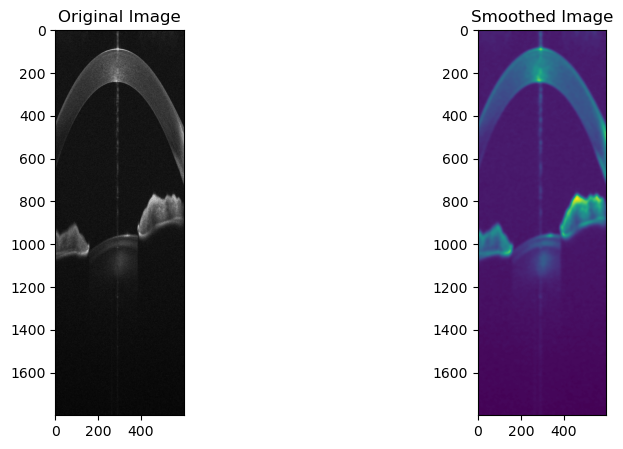

In [8]:
# Open and display the original image using matplotlib
original_img = img


# Open and display the smoothed image using matplotlib
smoothed_img = plt.imread('/home/skanda/kc_image_analysis/convertedImages/smoothed_image_.png')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
ax1.imshow(original_img)
ax1.set_title('Original Image')

# Display the smoothed image in the second subplot
ax2.imshow(smoothed_img)
ax2.set_title('Smoothed Image')

# Show the figure
plt.show()


### **Mean Squared Error** (MSE): This is a simple metric that measures the average squared difference between the pixels in two images. A lower MSE indicates better image quality.

### **Peak Signal-to-Noise Ratio** (PSNR): This is a measure of the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. A higher PSNR indicates better image quality.

In [9]:


# Load the reference and test images
ref_img = Image.open('/home/skanda/kc_image_analysis/convertedImages/original_image.png')
test_img = Image.open('/home/skanda/kc_image_analysis/convertedImages/smoothed_image.png')

# Calculate the MSE and PSNR between the images
mse = mean_squared_error(ref_img, test_img)
psnr = peak_signal_noise_ratio(ref_img, test_img)

# Print the results
print('MSE: {:.2f}'.format(mse))
print('PSNR: {:.2f}'.format(psnr))


AttributeError: shape

In [10]:

# Load the reference and test images
ref_img = Image.open('/home/skanda/kc_image_analysis/convertedImages/original_image.png')
test_img = Image.open('/home/skanda/kc_image_analysis/convertedImages/smoothed_image.png')

# Resize the images to the same size
width, height = min(ref_img.size, test_img.size)
ref_img = ref_img.resize((width, height))
test_img = test_img.resize((width, height))

print('Ref img size: {}, Ref img mode: {}'.format(ref_img.size, ref_img.mode))

print('Test img size: {},Test img Mode: {}'.format(test_img.size, ref_img.mode) )

# Convert the images to NumPy arrays
ref_array = np.array(ref_img)
test_array = np.array(test_img)

# Calculate the MSE and PSNR between the images
mse = mean_squared_error(ref_array, test_array)
psnr = peak_signal_noise_ratio(ref_array, test_array)

# Print the results
print('MSE: {:.2f}'.format(mse))
print('PSNR: {:.2f}'.format(psnr))


Ref img size: (600, 1800), Ref img mode: RGB
Test img size: (600, 1800),Test img Mode: RGB


ValueError: Input images must have the same dimensions.

### **Edge Detection** using **Sobel Operator**
The Sobel X operator detects edges in the horizontal direction, while the Sobel Y operator detects edges in the vertical direction. These operators are used together to find the edges in an image in all directions.

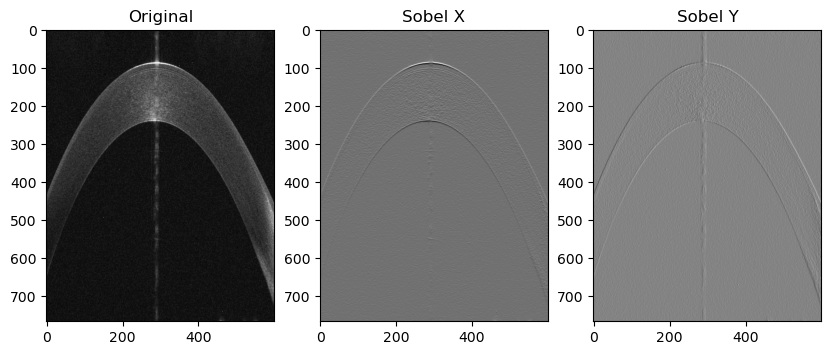

In [11]:

# Load the image
image = io.imread('/home/skanda/kc_image_analysis/convertedImages/cropped_image.png', as_gray=True)

# Apply Sobel filter along x-axis and y-axis
sobel_x = filters.sobel_h(image)
sobel_y = filters.sobel_v(image)

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].imshow(image, cmap='binary')
ax[0].set_title('Original')
ax[1].imshow(sobel_x, cmap='binary')
ax[1].set_title('Sobel X')
ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title('Sobel Y')
plt.show()

### Median Filtering

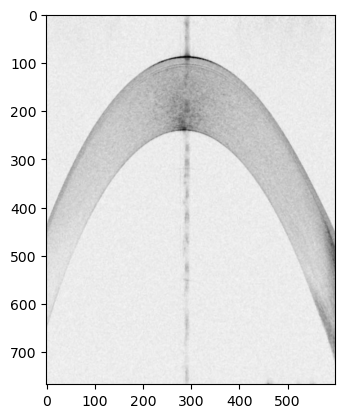

In [12]:

# Load the image
img = Image.open('/home/skanda/kc_image_analysis/convertedImages/cropped_image.png')

# Apply median filtering with a 3x3 kernel
img_median = img.filter(ImageFilter.MedianFilter(size=3))

plt.imshow(img_median)
plt.show()



### Fourier Filtering

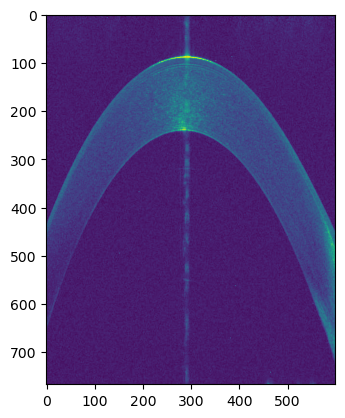

In [13]:


# Load the image and convert to grayscale
img = Image.open('/home/skanda/kc_image_analysis/convertedImages/cropped_image.png').convert('L')

# Apply Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Create a filter that removes the vertical frequencies
rows, cols = img.size
crow, ccol = rows // 2, cols // 2
fshift[:, ccol-1:ccol+2] = 0

# Perform inverse Fourier transform
f_ishift = np.fft.ifftshift(fshift)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Normalize and invert the image
img_filtered = ImageOps.invert(Image.fromarray(np.uint8(img_filtered)))
img_filtered = img_filtered.convert('L')

plt.imshow(img_filtered)
plt.show()

